# Grafiek met percentage overlevenden

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 

In [16]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

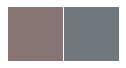

In [17]:
sns.palplot(sns.color_palette("Set1", n_colors=2, desat=.1))

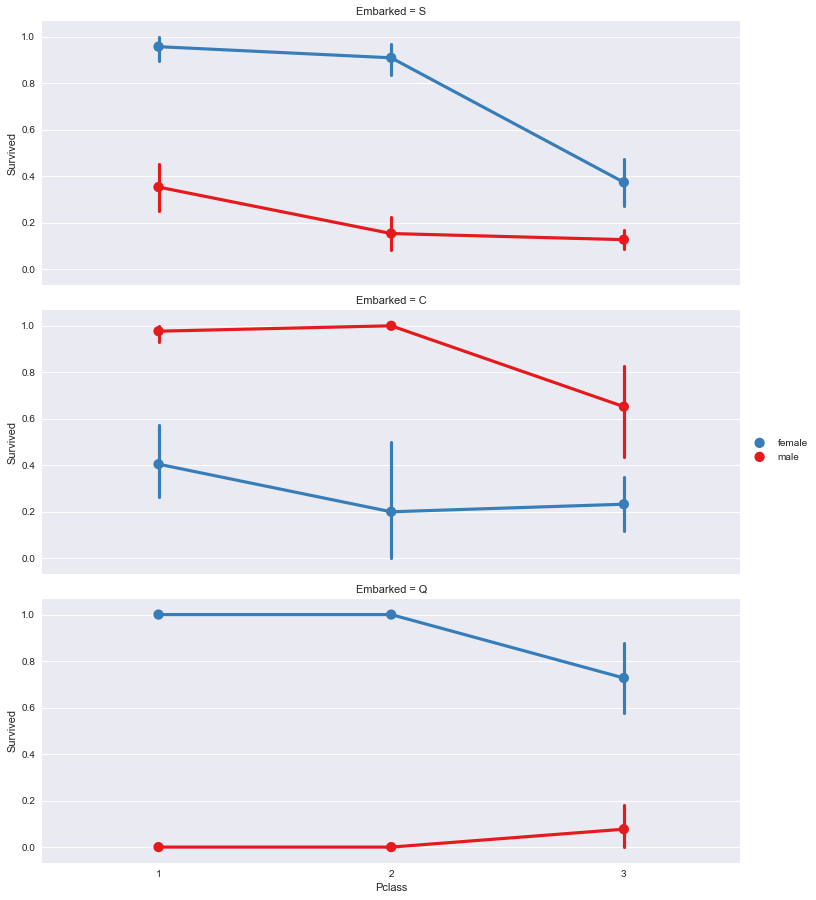

In [18]:
grid = sns.FacetGrid(df_train, row='Embarked', size=4.2, aspect=2.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='Set1')
grid.add_legend()

## Conclusie

Uit deze grafieken valt te concluderen dat de vrouwen die in Southhampson en Queenstown opgestapt zijn en in de eerste en tweede klas zaten, een grote overlevingskans hadden. De mannen hadden uit deze steden hadden een lagere overlevingskans. De mannen uit Cherbourg hadden ook een hoge overlevingskans. De vrouwen uit Cherbourg een relatief lage.

# Forse

In [19]:
df_young_survived = df_train[(df_train['Fare'] < 10) & (df_train['Survived'] == 1)].count()
df_young_died = df_train[(df_train['Fare'] < 10) & (df_train['Survived'] == 0)].count()

df_20p_survived = df_train[(df_train["Fare"] <= 30) & (df_train["Fare"] >= 20) & (df_train['Survived'] == 1)].count()
df_20p_died = df_train[(df_train["Fare"] <= 30) & (df_train["Fare"] >= 20) & (df_train['Survived'] == 0)].count()

df_30p_survived = df_train[(df_train["Fare"] < 40) & (df_train["Fare"] >= 30)& (df_train['Survived'] == 1)].count()
df_30p_died = df_train[(df_train["Fare"] < 40) & (df_train["Fare"] >= 30)& (df_train['Survived'] == 0)].count()

df_40p_survived = df_train[(df_train["Fare"] <50 ) & (df_train["Fare"] >= 40)& (df_train['Survived'] == 1)].count()
df_40p_died = df_train[(df_train["Fare"] <50 ) & (df_train["Fare"] >= 40)& (df_train['Survived'] == 0)].count()

df_O_survived = df_train[(df_train['Fare'] > 50 ) & (df_train['Survived'] == 1)].count()
df_O_died = df_train[(df_train['Fare'] > 50) & (df_train['Survived'] == 0)].count()

df_NaN_survived = df_train[(df_train.Fare.isnull())  & (df_train['Survived'] == 1)].count()
df_NaN_died = df_train[(df_train.Fare.isnull())  & (df_train['Survived'] == 0)].count()

In [20]:
raw_data ={
    'ageclasses': ['young', '20-30', '30-40', '40-50', '50+','Age Not Available'],
    'survived': [df_young_survived.Survived , df_20p_survived.Survived , df_30p_survived.Survived , df_40p_survived.Survived , df_O_survived.Survived , df_NaN_survived.Survived],
    'died': [df_young_died.Survived , df_20p_died.Survived , df_30p_died.Survived , df_40p_died.Survived , df_O_died.Survived , df_NaN_died.Survived]
}

df_survivors = pd.DataFrame(raw_data, columns=['survived', 'died'])

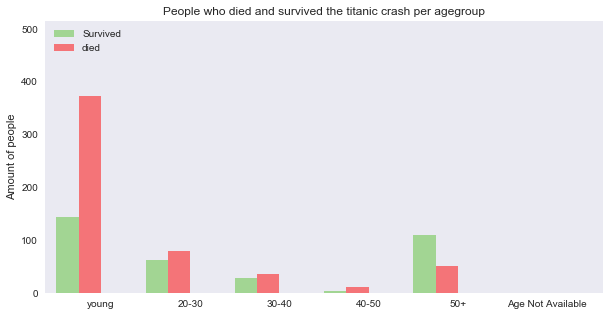

In [21]:
pos = list(range(len(df_survivors['died'])))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos,
        df_survivors['survived'],
        width,
        alpha=0.5,
        color='#5BC236',
        label=raw_data['ageclasses'][0])
plt.bar([p + width for p in pos],
        df_survivors['died'],
        width,
        alpha=0.5,
        color='#FF0000',
        label=raw_data['ageclasses'][1])

# Set the y axis label
ax.set_ylabel('Amount of people')

# Set the chart's title
ax.set_title('People who died and survived the titanic crash per agegroup')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(raw_data['ageclasses'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_survivors['survived'] + df_survivors['died'])] )

# Adding the legend and showing the plot
plt.legend(['Survived', 'died'], loc='upper left')
plt.grid()
plt.show()